C:\Users\Stark\AppData\Local\Temp\ipykernel_26512\4018059716.py:13: SymPyDeprecationWarning: 

non-Expr objects in a Matrix is deprecated. Matrix represents
a mathematical matrix. To represent a container of non-numeric
entities, Use a list of lists, TableForm, NumPy array, or some
other data structure instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-non-expr-in-matrix
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  return sym.Matrix([[(0, -2*t), (0, 0)],[(s*c, 0), (0, 0)]])


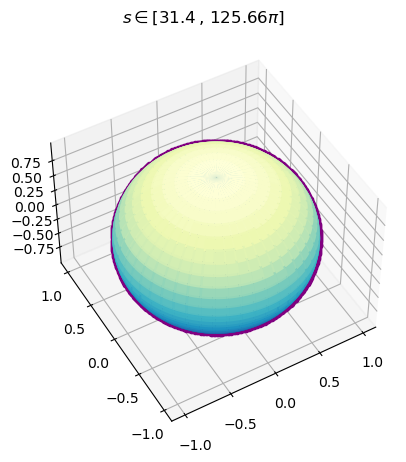

In [9]:
import sympy as sym
from sympy.abc import u,v
import numpy as np
import scipy.integrate as sc
from matplotlib import *
import matplotlib.pylab as pl
from mpl_toolkits.mplot3d import Axes3D
 
def great_circle():
    t = sym.tan(v)
    s = sym.sin(v)
    c = sym.cos(v)
    return sym.Matrix([[(0, -2*t), (0, 0)],[(s*c, 0), (0, 0)]])
 
def geodesic(u0,s0,s1,ds): 
    C = great_circle()
    X = solve(C,u0,s0,s1,ds)
    
    N = X[:,0].shape[0]
    u,v = pl.meshgrid(np.linspace(0,2*np.pi,N),np.linspace(0,2*np.pi,N))
    x = np.cos(u)*np.cos(v)
    y = np.sin(u)*np.cos(v)
    z = np.sin(v)
    
 
    fig = pl.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=48, azim=-120)
    ax.plot_surface(x,y,z,linewidth=0,cmap=plt.cm.YlGnBu_r)
    
    
    # plot the parametrized data on to the sphere
    u,v = X[:,0], X[:,2]
    x = np.cos(u)*np.cos(v)
    y = np.sin(u)*np.cos(v)
    z = np.sin(v)
    ax.plot(x,y,z,'.',color='purple')
    fig.suptitle('$s\in[%.1f\, , \,%.2f\pi]$'%(s0,s1))
    s1_ = s1/np.pi
    pl.show()
 
 
def f(y,s,C,u,v):
    y0 = y[0] # u
    y1 = y[1] # u'
    y2 = y[2] # v
    y3 = y[3] # v'
    dy = np.zeros_like(y)
    dy[0] = y1
    dy[2] = y3
 
    C = C.subs({u:y0,v:y2})
 
    dy[1] = -C[0,0][0]*dy[0]**2 -\
          2*C[0,0][1]*dy[0]*dy[2] -\
             C[0,1][1]*dy[2]**2
    dy[3] = -C[1,0][0]*dy[0]**2 -\
           2*C[1,0][1]*dy[0]*dy[2] -\
             C[1,1][1]*dy[2]**2
    return dy
 
def solve(C,u0,s0,s1,ds):
    s = np.arange(s0,s1+ds,ds)
    return sc.odeint(f,u0,s,args=(C,u,v))
 

u0 = [0,0.05,0,0.05]
s0 = 10*np.pi
s1 = 40*np.pi
ds = 0.15
geodesic(u0,s0,s1,ds)

C:\Users\Stark\AppData\Local\Temp\ipykernel_26512\4018059716.py:13: SymPyDeprecationWarning: 

non-Expr objects in a Matrix is deprecated. Matrix represents
a mathematical matrix. To represent a container of non-numeric
entities, Use a list of lists, TableForm, NumPy array, or some
other data structure instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-non-expr-in-matrix
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  return sym.Matrix([[(0, -2*t), (0, 0)],[(s*c, 0), (0, 0)]])


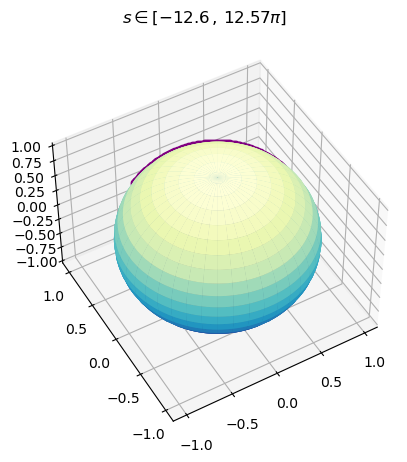

In [10]:
s0 = -4*np.pi
s1 = 4*np.pi
ds = 0.1
geodesic(u0,s0,s1,ds)

C:\Users\Stark\AppData\Local\Temp\ipykernel_26512\4018059716.py:13: SymPyDeprecationWarning: 

non-Expr objects in a Matrix is deprecated. Matrix represents
a mathematical matrix. To represent a container of non-numeric
entities, Use a list of lists, TableForm, NumPy array, or some
other data structure instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-non-expr-in-matrix
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  return sym.Matrix([[(0, -2*t), (0, 0)],[(s*c, 0), (0, 0)]])


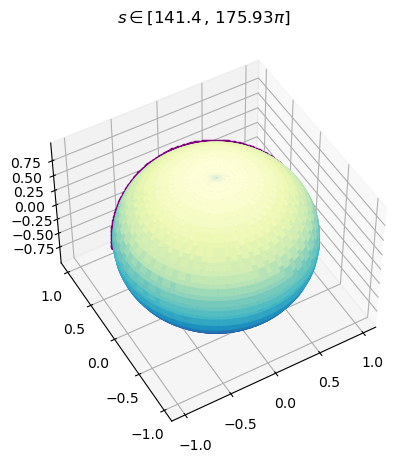

In [11]:
s0 = 45*np.pi
s1 = 56*np.pi
ds = 0.2
geodesic(u0,s0,s1,ds)